# Python Lab Exercise #2

## Objectives:

- Load .csv files into `pandas` DataFrames
- Describe and manipulate data in Series and DataFrames
- Visualize data using DataFrame methods and `matplotlib`

![pandas](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/2880px-Pandas_logo.svg.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## What is Pandas?

Pandas, as [the Anaconda docs](https://docs.anaconda.com/anaconda/packages/py3.7_osx-64/) tell us, offers us "High-performance, easy-to-use data structures and data analysis tools." It's something like "Excel for Python", but it's quite a bit more powerful.

Let's read in the heart dataset.

Pandas has many methods for reading different types of files. Note that here we have a .csv file.

Read about this dataset [here](https://www.kaggle.com/ronitf/heart-disease-uci).

In [3]:
heart_df = pd.read_csv('./data/heart.csv')

The output of the `.read_csv()` function is a pandas *DataFrame*, which has a familiar tabaular structure of rows and columns.

In [4]:
type(heart_df)

pandas.core.frame.DataFrame

In [5]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## DataFrames and Series

Two main types of pandas objects are the DataFrame and the Series, the latter being in effect a single column of the former:

In [6]:
age_series = heart_df['age']
type(age_series)

pandas.core.series.Series

Notice how we can isolate a column of our DataFrame simply by using square brackets together with the name of the column.

Both Series and DataFrames have an *index* as well:

In [7]:
heart_df.index

RangeIndex(start=0, stop=303, step=1)

In [8]:
age_series.index

RangeIndex(start=0, stop=303, step=1)

Pandas is built on top of NumPy, and we can always access the NumPy array underlying a DataFrame using `.values`.

In [9]:
heart_df.values

array([[63.,  1.,  3., ...,  0.,  1.,  1.],
       [37.,  1.,  2., ...,  0.,  2.,  1.],
       [41.,  0.,  1., ...,  0.,  2.,  1.],
       ...,
       [68.,  1.,  0., ...,  2.,  3.,  0.],
       [57.,  1.,  0., ...,  1.,  3.,  0.],
       [57.,  0.,  1., ...,  1.,  2.,  0.]])

## Basic DataFrame Attributes and Methods

### `.head()`

In [12]:
heart_df.head(n=20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


### `.tail()`

In [13]:
heart_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### `.info()`

In [14]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### `.describe()`

In [16]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### `.dtypes`

In [17]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

### `.shape`

In [18]:
heart_df.shape

(303, 14)

### Exploratory Plots

Let's make ourselves a histogram of ages:

/Users/audrey.deleon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


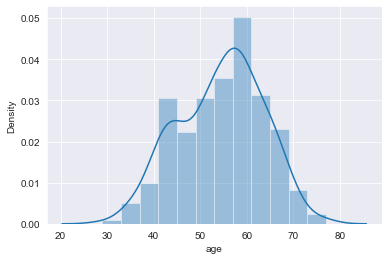

In [19]:
sns.set_style('darkgrid')
sns.distplot(a=heart_df['age']);
# For more recent versions of seaborn:
# sns.histplot(data=heart_df['age'], kde=True);

And while we're at it let's do a scatter plot of maximum heart rate vs. age:

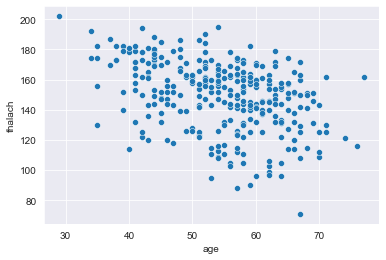

In [20]:
sns.scatterplot(x=heart_df['age'], y=heart_df['thalach']);

## Adding to a DataFrame

### Adding Rows

Here are two rows that our engineer accidentally left out of the .csv file, expressed as a Python dictionary:

In [21]:
extra_rows = {'age': [40, 30], 'sex': [1, 0], 'cp': [0, 0], 'trestbps': [120, 130],
              'chol': [240, 200],
             'fbs': [0, 0], 'restecg': [1, 0], 'thalach': [120, 122], 'exang': [0, 1],
              'oldpeak': [0.1, 1.0], 'slope': [1, 1], 'ca': [0, 1], 'thal': [2, 3],
              'target': [0, 0]}
extra_rows

{'age': [40, 30],
 'sex': [1, 0],
 'cp': [0, 0],
 'trestbps': [120, 130],
 'chol': [240, 200],
 'fbs': [0, 0],
 'restecg': [1, 0],
 'thalach': [120, 122],
 'exang': [0, 1],
 'oldpeak': [0.1, 1.0],
 'slope': [1, 1],
 'ca': [0, 1],
 'thal': [2, 3],
 'target': [0, 0]}

How can we add this to the bottom of our dataset?

In [22]:
# Let's first turn this into a DataFrame.
# We can use the .from_dict() method.

missing = pd.DataFrame(extra_rows)
missing

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
1,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


In [24]:
# Now we just need to concatenate the two DataFrames together.
# Note the `ignore_index` parameter! We'll set that to True.

heart_augmented = pd.concat([heart_df, missing],
                           ignore_index=True)

In [25]:
# Let's check the end to make sure we were successful!

heart_augmented.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
303,40,1,0,120,240,0,1,120,0,0.1,1,0,2,0
304,30,0,0,130,200,0,0,122,1,1.0,1,1,3,0


### Adding Columns

Adding a column is very easy in `pandas`. Let's add a new column to our dataset called "test", and set all of its values to 0.

In [26]:
heart_augmented['test'] = 0

In [27]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0


I can also add columns whose values are functions of existing columns.

Suppose I want to add the cholesterol column ("chol") to the resting systolic blood pressure column ("trestbps"):

In [28]:
heart_augmented['chol+trestbps'] = heart_augmented['chol'] + heart_augmented['trestbps']

In [29]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


## Filtering

We can use filtering techniques to see only certain rows of our data. If we wanted to see only the rows for patients 70 years of age or older, we can simply type:

In [30]:
heart_augmented['age'] >= 70

0      False
1      False
2      False
3      False
4      False
       ...  
300    False
301    False
302    False
303    False
304    False
Name: age, Length: 305, dtype: bool

In [31]:
heart_augmented[heart_augmented['age'] >= 70]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1,0,462
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1,0,375
129,74,0,1,120,269,0,0,121,1,0.2,2,1,2,1,0,389
144,76,0,2,140,197,0,2,116,0,1.1,1,0,2,1,0,337
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2,1,0,401
151,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1,0,261
225,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,0,319
234,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,0,452
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2,0,0,429
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0,429


Use '&' for "and" and '|' for "or".

### Exercise

Display the patients who are 70 or over as well as the patients whose trestbps score is greater than 170.

In [77]:
# Enter your code here
heart_augmented[heart_augmented['age'] >= 70],heart_augmented [heart_augmented['trestbps'] > 170]

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 25    71    0   1       160   302    0        1      162      0      0.4   
 60    71    0   2       110   265    1        0      130      0      0.0   
 129   74    0   1       120   269    0        0      121      1      0.2   
 144   76    0   2       140   197    0        2      116      0      1.1   
 145   70    1   1       156   245    0        0      143      0      0.0   
 151   71    0   0       112   149    0        1      125      0      1.6   
 225   70    1   0       145   174    0        1      125      1      2.6   
 234   70    1   0       130   322    0        0      109      0      2.4   
 238   77    1   0       125   304    0        0      162      1      0.0   
 240   70    1   2       160   269    0        1      112      1      2.9   
 
      slope  ca  thal  target  test  chol+trestbps  
 25       2   2     2       1     0            462  
 60       2   1     2       1     0          

### Exploratory Plot

Using the subframe we just made, let's make a scatter plot of their cholesterol levels vs. age and color by sex:

In [58]:
at_risk = #[ANSWER FROM EXERCISE]

sns.scatterplot(data=at_risk, x='age', y='chol', hue='sex');

SyntaxError: invalid syntax (4073297865.py, line 1)

### `.loc` and `.iloc`

We can use `.loc` to get, say, the first ten values of the age and resting blood pressure ("trestbps") columns:

In [59]:
heart_augmented.loc

In [60]:
heart_augmented.loc[:9, ['age', 'trestbps']]

,age,trestbps
0,63,145
1,37,130
2,41,130
3,56,120
4,57,120
5,57,140
6,56,140
7,44,120
8,52,172
9,57,150


`.iloc` is used for selecting locations in the DataFrame **by number**:

In [61]:
heart_augmented.iloc

In [62]:
heart_augmented.iloc[3, 0]

56

In [63]:
heart_augmented.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


### Exercise

How would we get the same slice as just above by using .iloc() instead of .loc()?

In [68]:
# Enter your code her
heart_augmented.iloc[0:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,test,chol+trestbps
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,378
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,380
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,334
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,356
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,474


## Statistics

### `.mean()`

In [69]:
heart_augmented.mean()

age               54.239344
sex                0.681967
cp                 0.960656
trestbps         131.580328
chol             246.091803
fbs                0.147541
restecg            0.527869
thalach          149.459016
exang              0.327869
oldpeak            1.036393
slope              1.396721
ca                 0.727869
thal               2.314754
target             0.540984
test               0.000000
chol+trestbps    377.672131
dtype: float64

Be careful! Some of these will are not straightforwardly interpretable. What does an average "sex" of 0.682 mean?

### `.min()`

In [70]:
heart_augmented.min()

age               29.0
sex                0.0
cp                 0.0
trestbps          94.0
chol             126.0
fbs                0.0
restecg            0.0
thalach           71.0
exang              0.0
oldpeak            0.0
slope              0.0
ca                 0.0
thal               0.0
target             0.0
test               0.0
chol+trestbps    249.0
dtype: float64

### `.max()`

In [71]:
heart_augmented.max()

age               77.0
sex                1.0
cp                 3.0
trestbps         200.0
chol             564.0
fbs                1.0
restecg            2.0
thalach          202.0
exang              1.0
oldpeak            6.2
slope              2.0
ca                 4.0
thal               3.0
target             1.0
test               0.0
chol+trestbps    679.0
dtype: float64

## Series Methods

### `.value_counts()`

How many different values does slope have? What about sex? And target?

In [72]:
heart_augmented['slope'].value_counts()

2    142
1    142
0     21
Name: slope, dtype: int64

In [73]:
heart_augmented['sex'].value_counts()

1    208
0     97
Name: sex, dtype: int64

### `.sort_values()`

In [74]:
heart_augmented['age'].sort_values()

72     29
304    30
58     34
125    34
65     35
       ..
25     71
60     71
129    74
144    76
238    77
Name: age, Length: 305, dtype: int64

## `pandas`-Native Plotting

The `.plot()` and `.hist()` methods available for DataFrames use a wrapper around `matplotlib`:

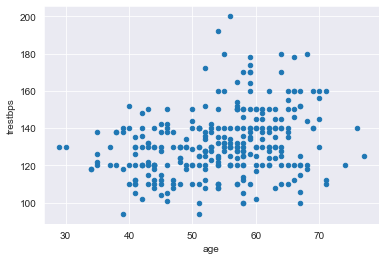

In [75]:
heart_augmented.plot(x='age', y='trestbps', kind='scatter');

In [8]:
heart_augmented.hist(column='chol');

NameError: name 'heart_augmented' is not defined

### Exercises

1. Make a bar plot of "age" vs. "slope" for the `heart_augmented` DataFrame.

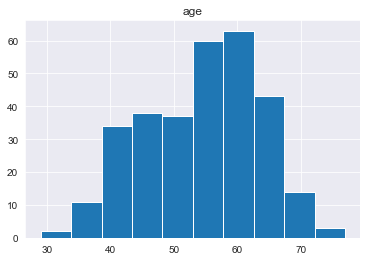

In [78]:
# Enter your code here
heart_augmented.hist(column='age');

2. Make a histogram of ages for **just the men** in `heart_augmented` (heart_augmented['sex']=1).

In [12]:
# Enter your code here

heart_augmented.hist('sex'==1);


NameError: name 'heart_augmented' is not defined

3. Make separate scatter plots of cholesterol vs. resting systolic blood pressure for the target=0 and the target=1 groups. Put both plots on the same figure and give each an appropriate title.

In [ ]:
# Enter your code here

